# Basic commands for x-array

In [1]:
# run script that installs missing libraries
! chmod 755 scripts.sh
! ./scripts.sh

In [3]:
import os
from matplotlib import pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cf_units
from datetime import datetime
from datetime import timedelta
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

In [4]:
dsr = xr.open_dataset('../data/year-MAR_ACCESS1.3-1980-2100_zen.nc2')
ds = dsr.load()
ds

<xarray.Dataset>
Dimensions:    (X: 176, Y: 148, SECTOR1_1: 1, TIME: 121, bnds: 2)
Coordinates:
  * X          (X) float32 -3.01e+03 -2.975e+03 -2.94e+03 ... 3.08e+03 3.115e+03
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
  * TIME       (TIME) datetime64[ns] 1980-07-02 ... 2100-07-02T12:00:00
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] 1980-01-01 1981-01-01 ... 2101-01-01
    SMB        (TIME, SECTOR1_1, Y, X) float64 nan nan nan nan ... nan nan nan
    SF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    RF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SU         (TIME, SECTOR1_1, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RU         (TIME, SECTOR1_1, Y, X) float32 inf inf inf inf ... inf inf inf
Attributes:
    Conventions:       CF-1.6
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....
    contact:           ckittel@uliege.be
    creation_date:     2021-01-23-T13:24:17Z
    driving_model_id:  ACCESS1.3
    institute_id:      ULg
    institution:       University of Liege - Belgium
    reference:         http://www.climato.be
    tracking_id:       ddbf4239bdd46d1127a1bf5625cf2bc0

---

## Extracting data or "indexing" : `.sel`, `.isel`

Xarray supports

- label-based indexing using `.sel`
- position-based indexing using `.isel`

For more see https://xarray.pydata.org/en/stable/indexing.html

### Label-based indexing

Xarray inherits its label-based indexing rules from pandas; this means great
support for dates and times!

In [5]:
# pull out data for all of 2037-July
ds.sel(TIME="2037-07")

<xarray.Dataset>
Dimensions:    (X: 176, Y: 148, SECTOR1_1: 1, TIME: 1, bnds: 2)
Coordinates:
  * X          (X) float32 -3.01e+03 -2.975e+03 -2.94e+03 ... 3.08e+03 3.115e+03
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
  * TIME       (TIME) datetime64[ns] 2037-07-02T12:00:00
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] 2037-01-01 2038-01-01
    SMB        (TIME, SECTOR1_1, Y, X) float64 nan nan nan nan ... nan nan nan
    SF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    RF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SU         (TIME, SECTOR1_1, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RU         (TIME, SECTOR1_1, Y, X) float32 inf inf inf inf ... inf inf inf
Attributes:
    Conventions:       CF-1.6
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....
    contact:           ckittel@uliege.be
    creation_date:     2021-01-23-T13:24:17Z
    driving_model_id:  ACCESS1.3
    institute_id:      ULg
    institution:       University of Liege - Belgium
    reference:         http://www.climato.be
    tracking_id:       ddbf4239bdd46d1127a1bf5625cf2bc0

In [6]:
# demonstrate slicing
ds.sel(TIME=slice("2013-05", "2013-07"))

<xarray.Dataset>
Dimensions:    (X: 176, Y: 148, SECTOR1_1: 1, TIME: 1, bnds: 2)
Coordinates:
  * X          (X) float32 -3.01e+03 -2.975e+03 -2.94e+03 ... 3.08e+03 3.115e+03
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
  * TIME       (TIME) datetime64[ns] 2013-07-02T12:00:00
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] 2013-01-01 2014-01-01
    SMB        (TIME, SECTOR1_1, Y, X) float64 nan nan nan nan ... nan nan nan
    SF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    RF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SU         (TIME, SECTOR1_1, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RU         (TIME, SECTOR1_1, Y, X) float32 inf inf inf inf ... inf inf inf
Attributes:
    Conventions:       CF-1.6
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....
    contact:           ckittel@uliege.be
    creation_date:     2021-01-23-T13:24:17Z
    driving_model_id:  ACCESS1.3
    institute_id:      ULg
    institution:       University of Liege - Belgium
    reference:         http://www.climato.be
    tracking_id:       ddbf4239bdd46d1127a1bf5625cf2bc0

In [7]:
# demonstrate "nearest" indexing
ds.sel(X=240.2, method="nearest")

<xarray.Dataset>
Dimensions:    (Y: 148, SECTOR1_1: 1, TIME: 121, bnds: 2)
Coordinates:
    X          float32 245.0
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
  * TIME       (TIME) datetime64[ns] 1980-07-02 ... 2100-07-02T12:00:00
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] 1980-01-01 1981-01-01 ... 2101-01-01
    SMB        (TIME, SECTOR1_1, Y) float64 nan nan nan nan ... nan nan nan nan
    SF         (TIME, Y) float32 0.0 89.17 177.3 260.0 ... 162.3 105.1 48.38 0.0
    RF         (TIME, Y) float32 0.0 15.31 22.74 33.69 ... 80.81 43.72 22.6 0.0
    SU         (TIME, SECTOR1_1, Y) float32 0.0 725.8 685.8 ... 503.4 525.5 0.0
    RU         (TIME, SECTOR1_1, Y) float32 inf inf inf inf ... inf inf inf inf
Attributes:
    Conventions:       CF-1.6
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....
    contact:           ckittel@uliege.be
    creation_date:     2021-01-23-T13:24:17Z
    driving_model_id:  ACCESS1.3
    institute_id:      ULg
    institution:       University of Liege - Belgium
    reference:         http://www.climato.be
    tracking_id:       ddbf4239bdd46d1127a1bf5625cf2bc0

In [8]:
# "nearest indexing at multiple points"
ds.sel(X=[240.125, 234], Y=[40.3, 50.3], method="nearest")

<xarray.Dataset>
Dimensions:    (X: 2, Y: 2, SECTOR1_1: 1, TIME: 121, bnds: 2)
Coordinates:
  * X          (X) float32 245.0 245.0
  * Y          (Y) float32 35.0 35.0
  * SECTOR1_1  (SECTOR1_1) float32 1.0
  * TIME       (TIME) datetime64[ns] 1980-07-02 ... 2100-07-02T12:00:00
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] 1980-01-01 1981-01-01 ... 2101-01-01
    SMB        (TIME, SECTOR1_1, Y, X) float64 51.74 51.74 51.74 ... 64.33 64.33
    SF         (TIME, Y, X) float32 48.3 48.3 48.3 48.3 ... 59.28 59.28 59.28
    RF         (TIME, Y, X) float32 0.0003542 0.0003542 ... 0.001345 0.001345
    SU         (TIME, SECTOR1_1, Y, X) float32 -3.441 -3.441 ... -5.044 -5.044
    RU         (TIME, SECTOR1_1, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.6
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....
    contact:           ckittel@uliege.be
    creation_date:     2021-01-23-T13:24:17Z
    driving_model_id:  ACCESS1.3
    institute_id:      ULg
    institution:       University of Liege - Belgium
    reference:         http://www.climato.be
    tracking_id:       ddbf4239bdd46d1127a1bf5625cf2bc0

### Position-based indexing

This is similar to your usual numpy `array[0, 2, 3]` but with the power of named
dimensions!

In [9]:
# pull out time index 0 and lat index 0
ds.SMB.isel(TIME=0, X=30)  #  much better than ds.air[0, 0, :]

<xarray.DataArray 'SMB' (SECTOR1_1: 1, Y: 148)>
array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan, 638.15804672,
        679.36918831, 815.43026352, 814.10976982, 895.10147738,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan, 618.85560799, 604.07359219, 945.94064331,
        924.00768614, 528.51916504, 601.94599819,  11.64913464,
        -59.26143646, 611.41760349, 622.58422887, 708.80300522,
        712.41785854, 762.00595021, 622.27818465, 781.39560795,
        637.15443897,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan]])
Coordinates:
    X          float32 -1.96e+03
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
    TIME       datetime64[ns] 1980-07-02
Attributes:
    long_name:  Surface mass balance
    units:      kg m-2 yr-1

In [10]:
# demonstrate slicing
ds.SMB.isel(X=slice(10))

<xarray.DataArray 'SMB' (TIME: 121, SECTOR1_1: 1, Y: 148, X: 10)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
...
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * X          (X) float32 -3.01e+03 -2.975e+03 ... -2.73e+03 -2.695e+03
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
  * TIME       (TIME) datetime64[ns] 1980-07-02 ... 2100-07-02T12:00:00
Attributes:
    long_name:  Surface mass balance
    units:      kg m-2 yr-1

---

## High level computation: `groupby`, `resample`, `rolling`, `coarsen`, `weighted`

Xarray has some very useful high level objects that let you do common
computations:

1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)
1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
1. `weighted` :
   [Weight your data before reducing](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)


### groupby

In [11]:
# seasonal groups, see that we only have summer data (june, july, august)
ds.groupby("TIME.season")

DatasetGroupBy, grouped over 'season'
1 groups with labels 'JJA'.

In [12]:
# make a seasonal mean
seasonal_mean = ds.groupby("TIME.season").mean()
seasonal_mean

<xarray.Dataset>
Dimensions:    (X: 176, Y: 148, SECTOR1_1: 1, season: 1)
Coordinates:
  * X          (X) float32 -3.01e+03 -2.975e+03 -2.94e+03 ... 3.08e+03 3.115e+03
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
  * season     (season) object 'JJA'
Data variables:
    SMB        (season, SECTOR1_1, Y, X) float64 nan nan nan nan ... nan nan nan
    SF         (season, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    RF         (season, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SU         (season, SECTOR1_1, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RU         (season, SECTOR1_1, Y, X) float32 inf inf inf inf ... inf inf inf

### resample

In [13]:
# resample to monthly frequency
ds.resample(TIME="M").mean()

<xarray.Dataset>
Dimensions:    (TIME: 1441, X: 176, Y: 148, SECTOR1_1: 1)
Coordinates:
  * TIME       (TIME) datetime64[ns] 1980-07-31 1980-08-31 ... 2100-07-31
  * X          (X) float32 -3.01e+03 -2.975e+03 -2.94e+03 ... 3.08e+03 3.115e+03
  * Y          (Y) float32 -2.555e+03 -2.52e+03 ... 2.555e+03 2.59e+03
  * SECTOR1_1  (SECTOR1_1) float32 1.0
Data variables:
    SMB        (TIME, SECTOR1_1, Y, X) float64 nan nan nan nan ... nan nan nan
    SF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    RF         (TIME, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SU         (TIME, SECTOR1_1, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RU         (TIME, SECTOR1_1, Y, X) float32 inf inf inf inf ... inf inf inf

---

## Visualization: `.plot`

For more see https://xarray.pydata.org/en/stable/plotting.html and
https://xarray.pydata.org/en/stable/examples/visualization_gallery.html

We have seen very simple plots earlier. Xarray has some support for visualizing
3D and 4D datasets by presenting multiple facets (or panels or subplots) showing
variations across rows and/or columns.


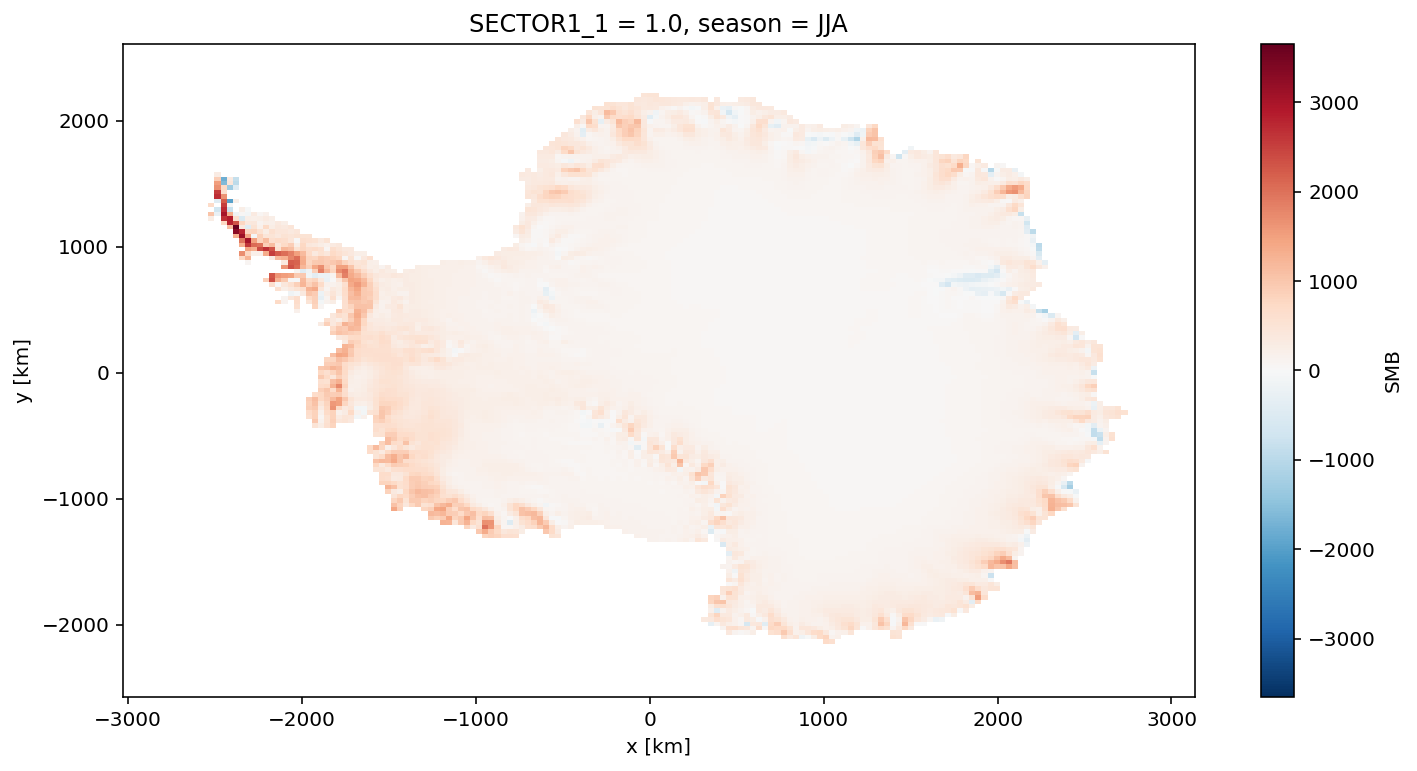

In [14]:
# facet the seasonal_mean
seasonal_mean.SMB.plot()

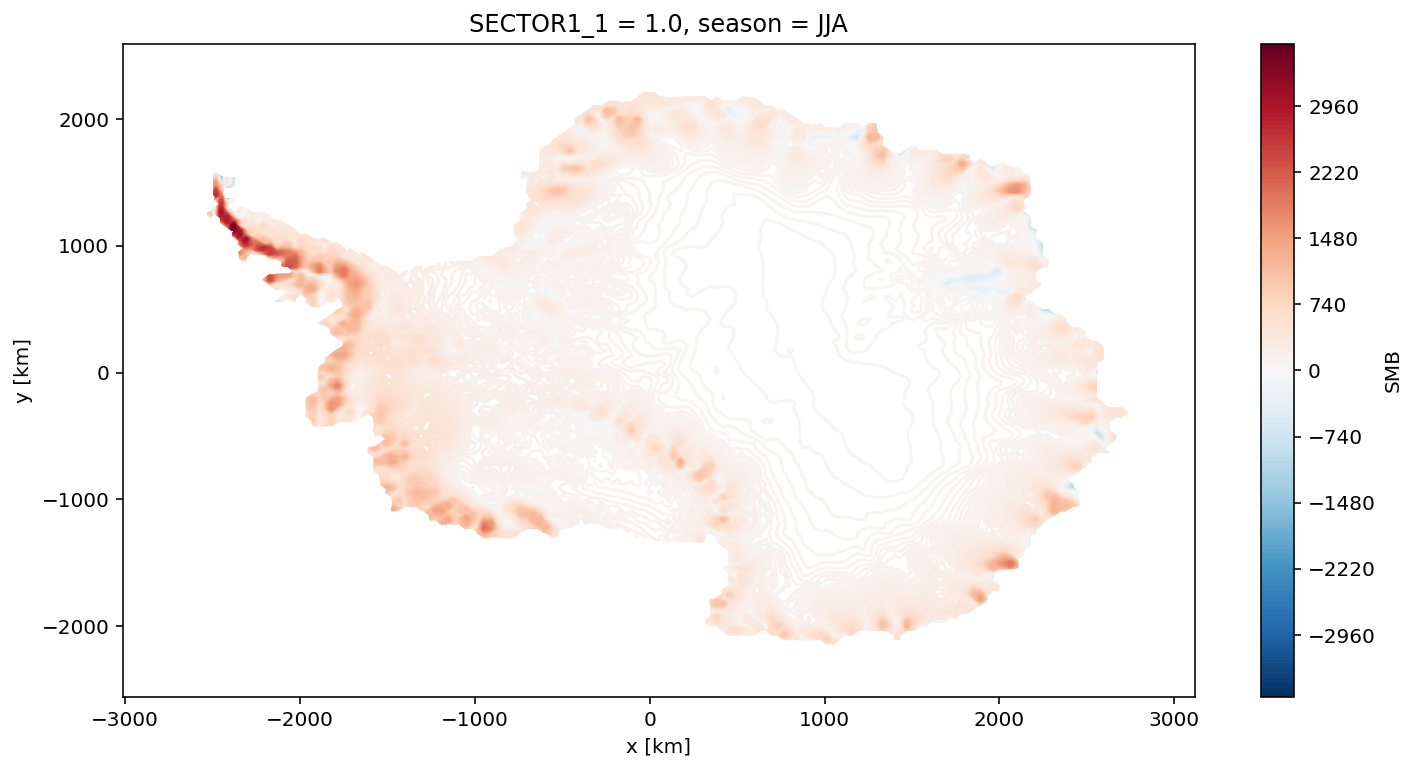

In [15]:
# contours
seasonal_mean.SMB.isel(SECTOR1_1=0, season =0).plot.contour(levels=800, add_colorbar=True)

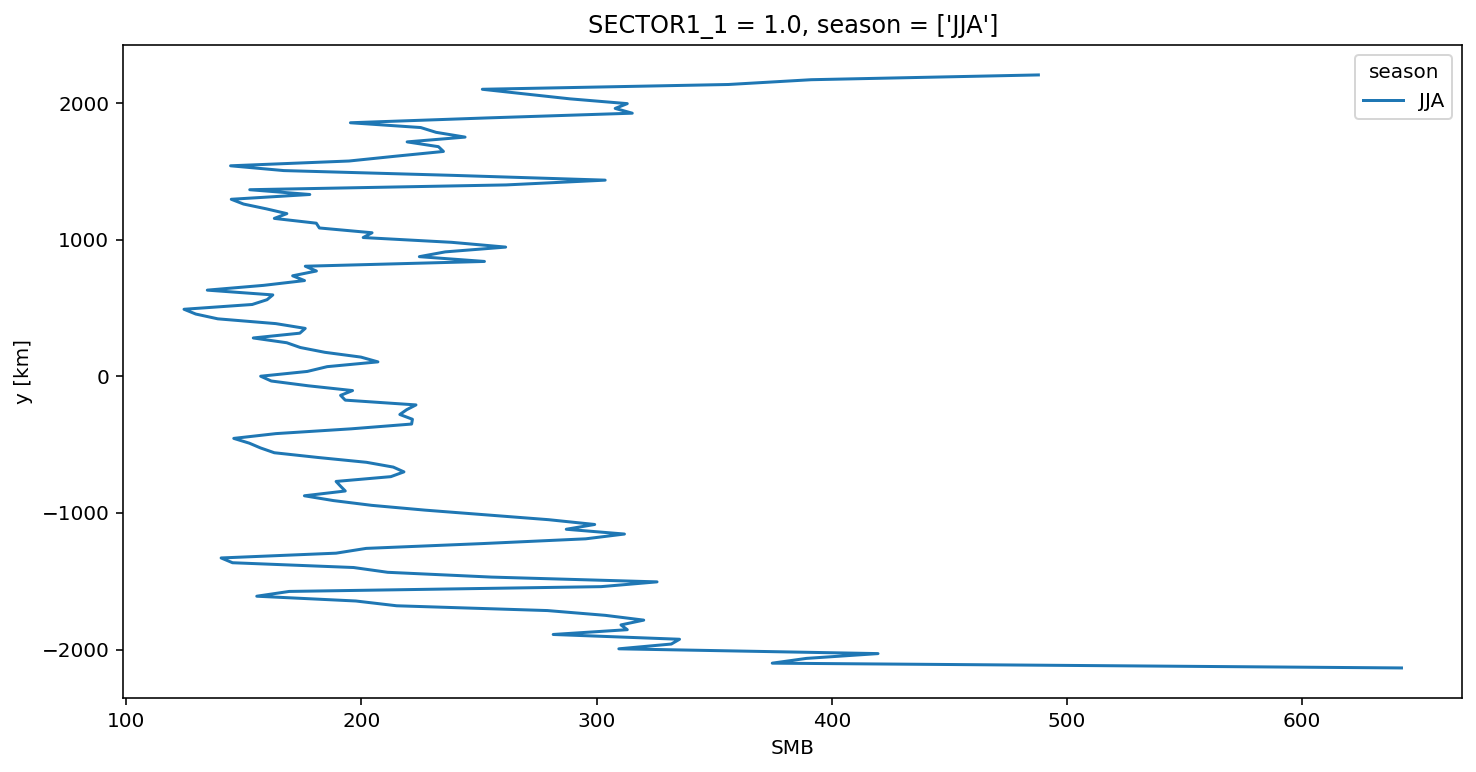

In [16]:
# line plots too? wut
seasonal_mean.SMB.isel(SECTOR1_1=0).mean("X").plot.line(hue="season", y="Y")

In [17]:
import plotly.express as px

df = pd.DataFrame(data = {"time":ds.TIME.data, "data" : ds.SMB.data}) 

fig = px.line(df, x="time", y="data", title='Life expectancy in Canada')
fig.show()

ValueError: Data must be 1-dimensional

In [ ]:
# pull out data for all of 2013-May
ds.sel(TIME="2037-07")